## xml 

we used the **etree** library, but there are others such as lxml 

In [8]:
import xml.etree.ElementTree as ET
# import etree library give us functions to manage xml files
arbol = ET.parse('subvenciones.xml')
asociaciones = {}
#preparamos el diccionario para almacenar lo datos
for fila in arbol.findall('Row'): # iter row para extract information
    centro = fila.find('Asociaci_n').text    #name of the centro
    subvencion = float(fila.find('Importe').text)    #the amount of grant
    if centro in asociaciones:
        asociaciones[centro] = asociaciones[centro] + subvencion #remember is a dictionary
    else:
        asociaciones[centro] = subvencion
for centro, total_subvencion in asociaciones.items():
    print(f'{centro}: {total_subvencion}')

AMPA ANTONIO MACHADO: 2344.99
AMPA BACHILLER ALONSO LOPEZ: 3200.0
AMPA CASTILLA: 2604.44
AMPA DAOIZ Y VELARDE: 3152.74
AMPA EMILIO CASADO: 3015.67
AMPA FEDERICO GARCIA LORCA: 1919.06
AMPA GABRIEL Y GALAN: 2741.51
AMPA LUIS BUÑUEL: 2081.0
AMPA MIGUEL HERNANDEZ: 2923.35
AMPA MIRAFLORES: 2787.21
AMPA PARQUE CATALUÑA: 2604.44
AMPA PROFESOR TIERNO GALVÁN: 1286.0
AMPA SEIS DE DICIEMBRE: 1950.0
AMPA VALDEPALITOS: 3929.5
AMPA LA CHOPERA: 1430.0
AMPA EL CUQUILLO: 1507.83
AMPA VALDELAPARRA: 2465.0
AMPA RIVENDEL: 2200.0
AMPA AGORA: 2421.67
AMPA ALDEBARAN: 3107.05
AMPA GINER DE LOS RIOS: 2058.0
AMPA SEVERO OCHOA: 3563.9700000000003
AMPA VIRGEN DE LA PAZ: 1416.45
AMPA JUAN XXIII: 1781.98
AMPA SAN ANTONIO: 2101.83
AMPA PADRE  MANYANET: 2695.82
AMPA FAPA: 3198.43


Just like with JSON, the XML format is more flexible than CSV and Excel, allowing us to represent information in a more compact way. Let's create a new XML file based on the one we have, which will have a root containing various associations. Each Association will have its name as an attribute, and as elements, the Total grant and the list of Activities. The list of activities will have **Activity** elements with **Name** and **Expense**.

In [10]:
arbol = ET.parse('subvenciones.xml')
raiz = arbol.getroot()
nuevo = ET.ElementTree()
raiz_nueva = ET.Element("Raiz")
nuevo._setroot(raiz_nueva)
elem_actual = ET.Element("Asociacion")
asoc_actual = ""
actividades = ET.SubElement(elem_actual, "Actividades")
gasto = 0
for fila in raiz.findall('Row'):
    asoc = fila.find('Asociaci_n').text
    act = fila.find('Actividad_Subvencionada').text
    imp = float(fila.find('Importe').text)
    if asoc_actual != asoc:
        gas_total = ET.SubElement(elem_actual, "Total")
        gas_total.text = str(gasto)
        elem_actual = ET.SubElement(raiz_nueva, "Asociacion")
        elem_actual.set('nombre', asoc)
        actividades = ET.SubElement(elem_actual, "Actividades")
        gasto = 0
    act_elem = ET.SubElement(actividades, "Actividad")
    nom_elem = ET.SubElement(act_elem, "Nombre")
    nom_elem.text = act
    imp_elem = ET.SubElement(act_elem, "Subvencion")
    imp_elem.text = str(imp)
    gasto = gasto + imp
    asoc_actual = asoc
nuevo.write('subvenciones_lista_total.xml')

# Lee el nuevo archivo XML
arbol_nuevo = ET.parse('subvenciones_lista_total.xml')
raiz_nueva = arbol_nuevo.getroot()

# Imprime la estructura del nuevo XML
# Lee el nuevo archivo XML
arbol_nuevo = ET.parse('subvenciones_lista_total.xml')
raiz_nueva = arbol_nuevo.getroot()

# Imprime la estructura del nuevo XML
for asociacion in raiz_nueva.findall('Asociacion'):
    nombre_asociacion = asociacion.get('nombre')
    print(f"Asociación: {nombre_asociacion}")

    for actividad in asociacion.findall('Actividades/Actividad'):
        nombre_actividad = actividad.find('Nombre').text
        subvencion_actividad = actividad.find('Subvencion').text
        print(f"  Actividad: {nombre_actividad}, Subvención: {subvencion_actividad}")

    total_elem = asociacion.find('Total')
    if total_elem is not None:
        total = total_elem.text
        print(f"  Total: {total}\n")
    else:
        print("  Total no disponible\n")

Asociación: AMPA ANTONIO MACHADO
  Actividad: TALLER FIESTA DE CARNAVAL, Subvención: 94.56
  Actividad: TALLER DIA DEL PADRE, Subvención: 39.04
  Actividad: TALLER DIA DE LA MADRE, Subvención: 43.64
  Actividad: FIESTA FIN DE CURSO, Subvención: 921.0
  Actividad: CONCURSO LOGOTIPO AMPA, Subvención: 56.57
  Actividad: ASOCIACION FAPA ALCOBENDAS, Subvención: 80.0
  Actividad: ASOCIACION FAPA GINER DE LOS RIOS, Subvención: 86.79
  Actividad: FIESTA DE NAVIDAD, Subvención: 660.0
  Actividad: HALLOWEEN, Subvención: 168.39
  Actividad: SAN ISIDRO, Subvención: 195.0
  Total: 2344.99

Asociación: AMPA BACHILLER ALONSO LOPEZ
  Actividad: MATEMATICAS MANIPULATIVAS, Subvención: 480.0
  Actividad: PROYECTO DE INGLES, Subvención: 480.0
  Actividad: EXCURSIONES PRIMARIA, Subvención: 928.0
  Actividad: GRADUACIÓN INFANTIL, Subvención: 360.0
  Actividad: GRADUACIÓN 6 PRIM, Subvención: 240.0
  Actividad: REVISTA COLEGIO ENTRETIZAS, Subvención: 220.0
  Actividad: FIESTA INTERCULTURAL, Subvención: 492.0


## Pandas and XML files

If we want used de **lxml** with **pandas** then:

In [17]:
from lxml import objectify  #analize the xml file
import numpy as np
import pandas as pd


xml_parseado = objectify.parse('CentrosPontevedra.xml')
root = xml_parseado.getroot()

datos = []  # store the list to insert in the dataframe
for elemento in root.getchildren():
    # creating a compressed list using lambda method
    datos.append([subelemento.pyval for subelemento in elemento.getchildren()])

#definy de colums of  xml files
columnas = ['Código', 'Nome', 'Enderezo', 'Concello', 'Provincia', 'Cód. postal', 'Teléfono',
            'Tipo de centro', 'COORDENADA_X', 'COORDENADA_Y', 'TITULARIDADE', 'ENSINO_CONCERTADO',
            'DEPENDENTE']

# Note the correct indentation for the following lines
df = pd.DataFrame(datos, columns=columnas)
df.set_index('Código', inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 36000031 to 36025153
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nome               612 non-null    object 
 1   Enderezo           612 non-null    object 
 2   Concello           612 non-null    object 
 3   Provincia          612 non-null    object 
 4   Cód. postal        612 non-null    object 
 5   Teléfono           612 non-null    object 
 6   Tipo de centro     612 non-null    object 
 7   COORDENADA_X       612 non-null    float64
 8   COORDENADA_Y       612 non-null    float64
 9   TITULARIDADE       612 non-null    object 
 10  ENSINO_CONCERTADO  612 non-null    object 
 11  DEPENDENTE         612 non-null    object 
dtypes: float64(2), object(10)
memory usage: 62.2+ KB


,Nome,Enderezo,Concello,Provincia,Cód. postal,Teléfono,Tipo de centro,COORDENADA_X,COORDENADA_Y,TITULARIDADE,ENSINO_CONCERTADO,DEPENDENTE
Código,,,,,,,,,,,,
36000031,CEIP Antonio Carpintero,"Rúa Miguel Davila, s/n (Consistorio)",Arbo,Pontevedra,36430,886110092,CEIP,42.112999,-8.313560,Pública,Non,Si
36000181,CEIP Amor Ruibal,Perdecanai (Santa María),Barro,Pontevedra,36194,886151996,CEIP,42.523861,-8.637228,Pública,Non,Si
36000247,CPI de Cova Terreña,Dolores Agrelo s/n,Baiona,Pontevedra,36300,886120001,CPI,42.116703,-8.852749,Pública,Non,Si
36000302,CEP de Sabarís,"Avenida Doutor Fariñas, 26 (Sabarís)",Baiona,Pontevedra,36393,886110143,CEP,42.108253,-8.820155,Pública,Non,Si
36000326,CEIP Plurilingüe Montemogos,Rúa Montemogos s/n,Bueu,Pontevedra,36937,886151115,CEIP,42.325676,-8.808290,Pública,Non,Si


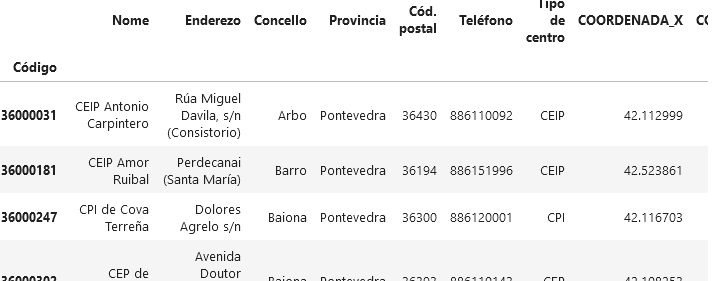